In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('Copy of EndMembers(1).csv', sep=',')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wavelength (nm)     825 non-null    float64
 1   BC-2-CRMB-5.5       825 non-null    float64
 2   BC-VG40-5.5-CG      825 non-null    float64
 3   BC-VG40-5.5-1T      825 non-null    float64
 4   BC-VG40-6.5         825 non-null    float64
 5   BC-VG40-5.5-1FT     825 non-null    float64
 6   BC-VG40-5.5-FG      825 non-null    float64
 7   BC-VG40-5.5-WC      825 non-null    float64
 8   BC-VG40-5.5-R       825 non-null    float64
 9   BC-VG40-5.5-NC      825 non-null    float64
 10  BC-VG40-4.5         825 non-null    float64
 11  BC-VG40-5.5-1F      825 non-null    float64
 12  BC-VG40-5.5-LTA     825 non-null    float64
 13  BC-VG40-5.5-1T .1   825 non-null    float64
 14  BC-VG40-5.5-1F .1   825 non-null    float64
 15  BC-VG40-5.5-1FT     825 non-null    float64
 16  BC-VG40-

In [5]:
wavelength=data['Wavelength (nm)']
data.drop(columns=['Wavelength (nm)'], inplace=True)

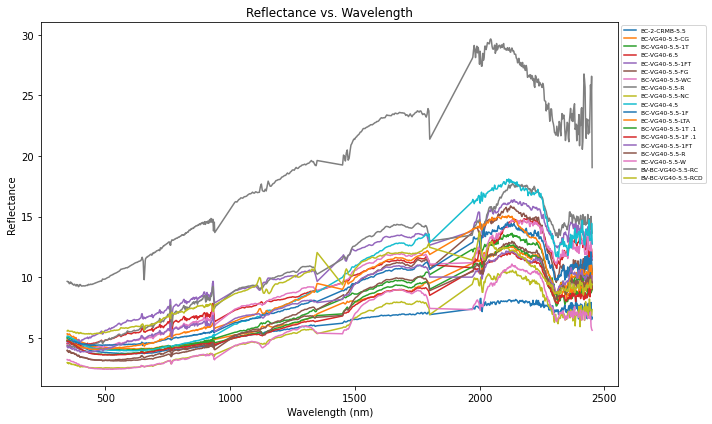

In [6]:
plt.figure(figsize=(10, 6))

for column in data.columns:
    plt.plot(wavelength, data[column], label=column)

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Reflectance vs. Wavelength')
legend = plt.legend(loc='upper left', fontsize=6,  bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
matrix = np.zeros((19, 19, 825))
prop_list=[]; # list of weights for each pixel

for i in range(19):
  for j in range(19):
    mat=0.5*np.random.rand(1, 19) # making a random weight array
    prop_list.append(mat)
    sum=np.sum(mat)
    for index in data.index:

      row=data.loc[index].to_numpy()
      matrix[i][j][index]=np.dot(mat, row)/sum # weighted average of each pixel

In [8]:
import numpy as np

# Assuming matrix is your 19x19x800 NumPy matrix
height, width, spectral_bands = matrix.shape

# Reshape the matrix to a hyperspectral image
hyperspectral_image = matrix.reshape(height, width, spectral_bands)

# Print the shape of the resulting hyperspectral image
print(hyperspectral_image.shape)

(19, 19, 825)


In [9]:
# Select 10 bands (adjust the band indices as needed)
selected_bands = hyperspectral_image[:, :, :10]

# Stack the selected bands along the last dimension to create a new array
stacked_bands = np.stack(selected_bands, axis=0)

print(stacked_bands.shape)

(19, 19, 10)


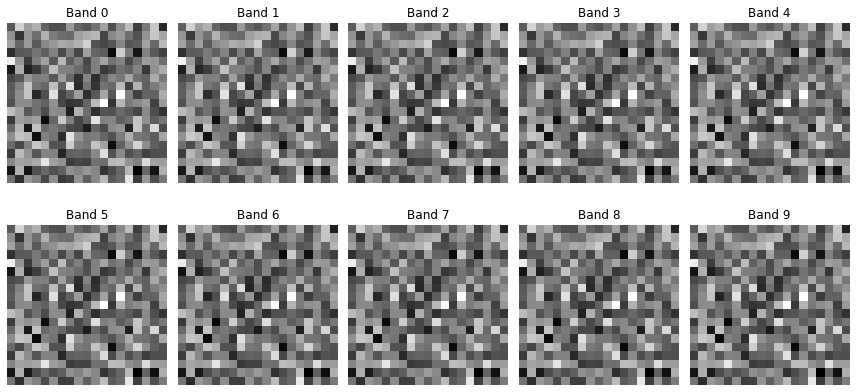

In [10]:
# Display the stacked bands as an image
plt.figure(figsize=(12, 6))  # Set the figure size

num_channels = stacked_bands.shape[2]
num_rows = 2
num_cols = (num_channels + 1) // 2

# Display each channel as a grayscale image
for channel_index in range(num_channels):
    plt.subplot(num_rows, num_cols, channel_index + 1)  # Create subplots for each channel
    plt.imshow(stacked_bands[:, :, channel_index], cmap='gray')
    plt.title(f'Band {channel_index}')
    plt.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

In [25]:
import json


# Convert the list of NumPy arrays to a list of lists
list_of_lists = [arr.tolist() for arr in prop_list]

# Serialize the list of lists to JSON
json_data = json.dumps(list_of_lists)


In [26]:
# Specify the file path
file_path = "hypercube_data.json"  # Replace with the desired file path

# Save the JSON data to a file
with open(file_path, "w") as file:
    file.write(json_data)


In [27]:
from IPython.display import FileLink

FileLink('hypercube_data.json')


C:\Users\rbharti1\BTP\hypercube_data.json

In [13]:
extra_list=[]; # list of weights for each pixel

for i in range(500):
    mat=0.5*np.random.rand(1, 19) # making a random weight array
    extra_list.append(mat)

In [28]:
# Convert the list of NumPy arrays to a list of lists
list_of_lists = [arr.tolist() for arr in extra_list]

# Serialize the list of lists to JSON
json_data = json.dumps(list_of_lists)


In [29]:
# Specify the file path
file_path = "ex_data.json"  # Replace with the desired file path

# Save the JSON data to a file
with open(file_path, "w") as file:
    file.write(json_data)


In [30]:
FileLink('ex_data.json')

C:\Users\rbharti1\BTP\ex_data.json